In [101]:
import pandas as pd

In [102]:
inputfile = "../data/consumption_data.xls"

In [103]:
outputfile = "../tmp/data_type.xls"

In [104]:
k = 3
iteration=500

In [105]:
data = pd.read_excel(inputfile, index_col='Id')

In [106]:
data

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05
...,...,...,...
938,19,4,1163.08
939,9,7,1007.06
940,27,7,1322.94


In [107]:
data.mean()

R      16.747872
F       9.615957
M    1061.683436
dtype: float64

In [108]:
data - data.mean()

,R,F,M
Id,,,
1,10.252128,-3.615957,-829.073436
2,-13.747872,-4.615957,445.426564
3,-12.747872,6.384043,-244.063436
4,-13.747872,1.384043,-828.873436
5,-2.747872,-2.615957,851.366564
...,...,...,...
938,2.252128,-5.615957,101.396564
939,-7.747872,-2.615957,-54.623436
940,10.252128,-2.615957,261.256564


In [109]:
data.std()

R     13.415743
F      7.325998
M    715.513381
dtype: float64

In [110]:
data_sz = (data - data.mean()) / data.std()

In [111]:
data_sz

,R,F,M
Id,,,
1,0.764186,-0.493579,-1.158711
2,-1.024757,-0.630079,0.622527
3,-0.950217,0.871423,-0.341103
4,-1.024757,0.188922,-1.158432
5,-0.204824,-0.357079,1.189868
...,...,...,...
938,0.167872,-0.766579,0.141712
939,-0.577521,-0.357079,-0.076342
940,0.764186,-0.357079,0.365132


In [112]:
from sklearn.cluster import KMeans

In [113]:
model = KMeans(n_clusters=k, max_iter=iteration, n_jobs=4)

In [114]:
model.fit(data_sz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [115]:
class_nums = pd.Series(model.labels_).value_counts() # 统计各个类别的数量

In [116]:
class_nums

0    559
1    341
2     40
dtype: int64

In [117]:
model.cluster_centers_ # ndarray

array([[-0.14935336, -0.65889299, -0.27177977],
       [-0.16045063,  1.11480154,  0.39284443],
       [ 3.45505486, -0.29565357,  0.44912342]])

In [118]:
centers = pd.DataFrame(model.cluster_centers_) # ndarray---->DataFrame

In [119]:
centers # 3个属性，3个类别。 

,0,1,2
0,-0.149353,-0.658893,-0.271780
1,-0.160451,1.114802,0.392844
2,3.455055,-0.295654,0.449123


In [140]:
data_and_type_df = pd.concat([data, pd.Series(model.labels_, data.index)], axis=1) # data.index 参数非常重要，不从零开始，中间不连续

In [141]:
data_and_type_df

,R,F,M,0
Id,,,,
1,27,6,232.61,0
2,3,5,1507.11,0
3,4,16,817.62,1
4,3,11,232.81,0
5,14,7,1913.05,0
...,...,...,...,...
938,19,4,1163.08,0
939,9,7,1007.06,0
940,27,7,1322.94,0


In [145]:
data_and_type_df.columns = list(cluster_and_num_df.columns[:-1]) + ['class type']

In [146]:
data_and_type_df

,R,F,M,class type
Id,,,,
1,27,6,232.61,0
2,3,5,1507.11,0
3,4,16,817.62,1
4,3,11,232.81,0
5,14,7,1913.05,0
...,...,...,...,...
938,19,4,1163.08,0
939,9,7,1007.06,0
940,27,7,1322.94,0


In [147]:
data_and_type_df.to_excel(outputfile)

In [100]:
cluster_and_num_df = pd.concat?

Signature:
pd.concat(
    objs,
    axis=0,
    join='outer',
    join_axes=None,
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    sort=None,
    copy=True,
)
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a dict is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis to concatenate along.
join : {'inner', 'outer'}, default 'outer'
    How to handle indexes on othe

In [ ]:
cluster_and_num_df = pd.concat

In [ ]:
cluster_and_num_df = pd.concat

In [69]:
pd.Series(model.labels_)

0      0
1      0
2      1
3      0
4      0
      ..
935    0
936    0
937    0
938    0
939    0
Length: 940, dtype: int32

In [148]:
pd.Series(model.labels_, index=data.index)

Id
1      0
2      0
3      1
4      0
5      0
      ..
938    0
939    0
940    0
941    0
942    0
Length: 940, dtype: int32

In [149]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1,

In [74]:
data

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05
...,...,...,...
938,19,4,1163.08
939,9,7,1007.06
940,27,7,1322.94


In [150]:
import matplotlib.pyplot as plt

In [151]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [153]:
def density_plot(data):
    plt.figure()
    
    p = data.plot(kind='kde', linewidth=2, subplots=True, sharex=False)
    
    for i in range(k):
        p[i].set_ylabel('密度')
    plt.legend()
    return plt

<Figure size 432x288 with 0 Axes>

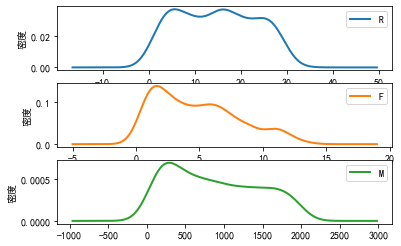

<Figure size 432x288 with 0 Axes>

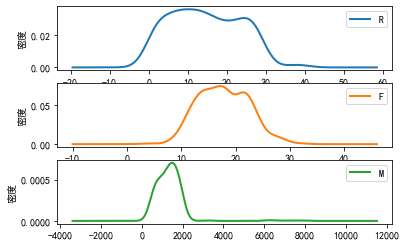

<Figure size 432x288 with 0 Axes>

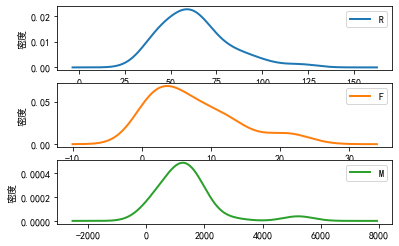

In [157]:
for i in range(k):
    density_plot(data[data_and_type_df['class type']==i])

In [80]:
data

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05
...,...,...,...
938,19,4,1163.08
939,9,7,1007.06
940,27,7,1322.94


In [82]:
s0 = data.iloc[0]

In [83]:
s0

R     27.00
F      6.00
M    232.61
Name: 1, dtype: float64

In [84]:
len(s0)

3

In [88]:
cluster_and_num_df

,0,1,2,class no
0,-0.149353,-0.658893,-0.271780,559
1,-0.160451,1.114802,0.392844,341
2,3.455055,-0.295654,0.449123,40


In [124]:
pd.Series(model.labels_)

0      0
1      0
2      1
3      0
4      0
      ..
935    0
936    0
937    0
938    0
939    0
Length: 940, dtype: int32

In [125]:
pd.Series(model.labels_, data.index)

Id
1      0
2      0
3      1
4      0
5      0
      ..
938    0
939    0
940    0
941    0
942    0
Length: 940, dtype: int32

In [126]:
len(model.labels_)

940

In [127]:
data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            933, 934, 935, 936, 937, 938, 939, 940, 941, 942],
           dtype='int64', name='Id', length=940)

In [128]:
len(data)

940

In [130]:
c_is = set(range(1, 943))
d_is = set(data.index)

In [131]:
c_is - d_is

{791, 819}

In [158]:
model.cluster_centers_

array([[-0.14935336, -0.65889299, -0.27177977],
       [-0.16045063,  1.11480154,  0.39284443],
       [ 3.45505486, -0.29565357,  0.44912342]])